In [1]:
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
from numpy import matlib


In [2]:
def rvs(dim=3):
     random_state = np.random
     H = np.eye(dim)
     D = np.ones((dim,))
     for n in range(1, dim):
         x = random_state.normal(size=(dim-n+1,))
         D[n-1] = np.sign(x[0])
         x[0] -= D[n-1]*np.sqrt((x*x).sum())
         # Householder transformation
         Hx = (np.eye(dim-n+1) - 2.*np.outer(x, x)/(x*x).sum())
         mat = np.eye(dim)
         mat[n-1:, n-1:] = Hx
         H = np.dot(H, mat)
         # Fix the last sign such that the determinant is 1
     D[-1] = (-1)**(1-(dim % 2))*D.prod()
     # Equivalent to np.dot(np.diag(D), H) but faster, apparently
     H = (D*H.T).T
     return H

In [3]:
def random_shift(radius=3):
    theta_1 = np.random.uniform(0, np.pi) # θ_1は[0,π/2]の値をとる
    theta_2 = np.random.uniform(0, np.pi*2) # θ_2は[0,π/2]の値をとる

    x = np.cos(theta_2)*np.sin(theta_1) * radius # xの極座標表示
    y = np.sin(theta_2)*np.sin(theta_1) * radius # yの極座標表示
    z = np.cos(theta_1) * radius # zの極座標表示
    shift_vector = np.array([x, y, z])
    return shift_vector

In [4]:
class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz
 
    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
 
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''
 
    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)
 
setattr(Axes3D,'annotate3D',_annotate3D)
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)
 
    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)
 
        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
 
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
 
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
 
setattr(Axes3D,'arrow3D',_arrow3D)

In [5]:
fixed_range = 10
radius = 10
def plot_quad_a(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0]*np.cos(u)*np.sin(v)
    Y = abc_list[1]*np.cos(u)*np.cos(v)
    Z = abc_list[2]*np.sin(u)
    
    X, Y, Z = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)
    
    fixed_range = 5
    
    ax.plot_surface(X, Y, Z,alpha=0.8 , color = 'slateblue')

def plot_quad_b(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0]*np.cosh(u)*np.cos(v)
    Y = abc_list[1]*np.cosh(u)*np.sin(v)
    Z = abc_list[2]*np.sinh(u)
    
    X, Y, Z = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)
    
    ax.plot_surface(X, Y, Z,alpha=0.8, color = 'slateblue')
    
def plot_quad_c(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0]*np.sinh(u)*np.cos(v)
    Y = abc_list[1]*np.sinh(u)*np.sin(v)
    Z = abc_list[2]*np.sinh(u)
    
    X, Y, Z = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)
    
    ax.plot_surface(X, Y, Z,alpha=0.8, color = 'slateblue')
    
def plot_quad_d(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0]*np.sinh(u)*np.cos(v)
    Y = abc_list[1]*np.sinh(u)*np.sin(v)
    Z = abc_list[2]*np.cosh(u)

    X_1, Y_1, Z_1 = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)
    X_2, Y_2, Z_2 = quad_rotation_and_shift(X, Y, -Z, rotation_matrix, shift_vector)
    
    ax.plot_surface(X_1, Y_1, Z_1,alpha=0.8 , color = 'slateblue')
    ax.plot_surface(X_2, Y_2, Z_2,alpha=0.8, color = 'slateblue')
    
def plot_quad_e(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0]*np.cos(v)
    Y = abc_list[1]*np.sin(v)
    Z = abc_list[2]*u
    
    X, Y, Z = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)
    
    ax.plot_surface(X, Y, Z,alpha=0.8 , color = 'slateblue')
   # ax.plot_wireframe(X, Y, -Z,alpha=0.8, color = 'slateblue')
  

def plot_quad_f(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0]*np.cosh(v)
    Y = abc_list[1]*np.sinh(v)
    Z = abc_list[2]*u
    
    X_1, Y_1, Z_1 = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)
    X_2, Y_2, Z_2 = quad_rotation_and_shift(-X, Y, Z, rotation_matrix, shift_vector)
    
    ax.plot_surface(X_1, Y_1, Z_1,alpha=0.8 , color = 'slateblue')
    ax.plot_surface(X_2, Y_2, Z_2,alpha=0.8 , color = 'slateblue')

def plot_quad_g(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0] * u * np.cos(v)
    Y = abc_list[1] * u * np.sin(v)
    Z = u ** 2

    X, Y, Z = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)

    fixed_range = 10
    
    ax.plot_surface(X, Y, Z,alpha=0.8 , color = 'slateblue')

  
def plot_quad_h(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0] * u 
    Y = abc_list[1] * v
    Z = X**2 - Y**2

    X, Y, Z = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)
    
    temp_range = 100
    
    ax.plot_surface(X, Y, Z,alpha=0.8, color = 'slateblue')
  
def plot_quad_i(ax, abc_list, u, v, rotation_matrix=np.diag(np.ones(3)), shift_vector=np.zeros(3)):
    X = abc_list[0] * u 
    Y = abc_list[1] * v
    Z = X**2
    
    #rotation_matrix=np.diag(np.ones(3))
    #shift_vector=np.zeros(3)
    
    X, Y, Z = quad_rotation_and_shift(X, Y, Z, rotation_matrix, shift_vector)
    
    fixed_range = 10

    ax.plot_surface(X, Y, Z,alpha=0.8, color = 'slateblue')
  

In [6]:
def quad_rotation_and_shift(x, y, z, rotation_matrix, shift_vector):
    x_transformed, y_transformed, z_transformed = np.zeros(x.shape), np.zeros(y.shape), np.zeros(z.shape)
    temp_vec=np.zeros(3)
    z_temp = np.zeros((len(z[0]), len(z[0])))

    for i in range(len(z[0])):
        z_temp[i] = z[i]

    for i in range(len(x)):
        for j in range(len(y)):
            temp_vec[0] = x[i][j]
            temp_vec[1] = y[i][j]
            temp_vec[2] = z_temp[i][j]
            temp_vec = np.dot(rotation_matrix, temp_vec)
            x_transformed[i][j] = temp_vec[0] + shift_vector[0]
            y_transformed[i][j] = temp_vec[1] + shift_vector[1]
            z_transformed[i][j] = temp_vec[2] + shift_vector[2]   
            
    return x_transformed, y_transformed, z_transformed
        
        

In [23]:
quad_dict = [ {'function':plot_quad_a, 'abc_list':[14, 8, 10], 'u_range':[-np.pi/2, np.pi/2], 'v_range':[0,2*np.pi], 'title':'(a)'}, 
             {'function':plot_quad_b, 'abc_list':[1, 1, 1], 'u_range':[-3, 3], 'v_range':[0,2*np.pi],  'title':'(b)'},
             {'function':plot_quad_c, 'abc_list':[1, 1, 1], 'u_range':[-3, 3], 'v_range':[0,2*np.pi],  'title':'(c)'},
             {'function':plot_quad_d, 'abc_list':[1, 1, 1], 'u_range':[-3, 3], 'v_range':[0,2*np.pi],  'title':'(d)'},
             {'function':plot_quad_e, 'abc_list':[6, 6, 6], 'u_range':[-np.pi/2, np.pi/2], 'v_range':[0,2*np.pi],  'title':'(e)'},
             {'function':plot_quad_f, 'abc_list':[1.5, 1.5, 1.5], 'u_range':[-5, 5], 'v_range':[-3,3],  'title':'(f)'},
             {'function':plot_quad_g, 'abc_list':[3, 3, 3], 'u_range':[0, 4], 'v_range':[0,2*np.pi],  'title':'(g)'}, 
             {'function':plot_quad_h, 'abc_list':[0.5, 0.5, 0.5], 'u_range':[-10,  10], 'v_range':[-10,10],  'title':'(h)'}, 
             {'function':plot_quad_i, 'abc_list':[1, 1, 1], 'u_range':[-5, 5], 'v_range':[-5,5],  'title':'(i)'}
]

for i in range(len(quad_dict)):
    quad_dict[i]['rotation_matrix'] = rvs()

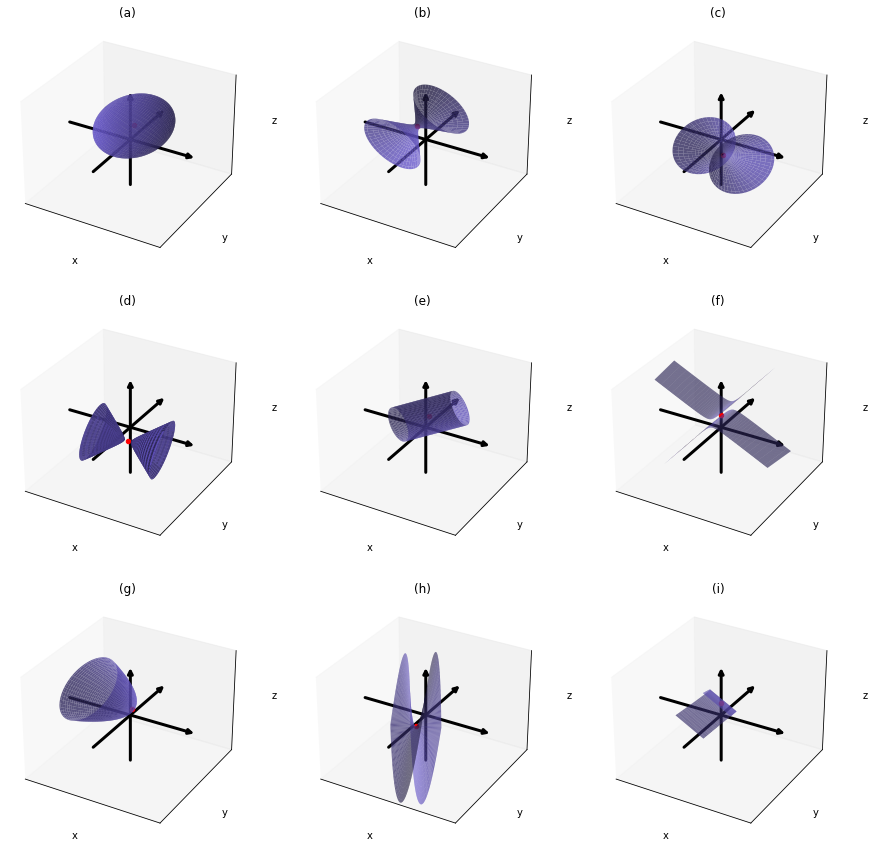

In [24]:
radius = 5

fig = plt.figure(figsize=(15,15))

for i in range(3*3):
    ax = fig.add_subplot(3, 3,  i + 1, projection='3d')
    resolution = 100
    u=np.linspace(quad_dict[i]['u_range'][0], quad_dict[i]['u_range'][1], resolution)
    v=np.linspace(quad_dict[i]['v_range'][0], quad_dict[i]['v_range'][1], resolution)
    u,v=np.meshgrid(u,v)
    shift_vector = random_shift(radius=radius)
    quad_dict[i]['function'](ax, quad_dict[i]['abc_list'], u, v, 
                             rotation_matrix=quad_dict[i]['rotation_matrix'], shift_vector=shift_vector)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.scatter(shift_vector[0], shift_vector[1], shift_vector[2], c='red')
    
    axis_range = 20
    
    ax.set_xlim(-axis_range, axis_range)
    ax.set_ylim(-axis_range, axis_range)
    ax.set_zlim(-axis_range, axis_range)
    ax.set_title(quad_dict[i]['title'])
    
    ax.arrow3D(-axis_range, 0, 0, 2*axis_range, 0, 0, 
                       mutation_scale=10,  arrowstyle="-|>", fc='black', ec='black', lw = 3)
    ax.arrow3D(0, -axis_range, 0, 0, 2*axis_range, 0, 
                       mutation_scale=10, arrowstyle="-|>", fc='black', ec='black', lw = 3)
    ax.arrow3D(0, 0, -axis_range, 0, 0, 2*axis_range, 
                       mutation_scale=10, arrowstyle="-|>", fc='black', ec='black', lw = 3)
    
plt.savefig('quad_types_1.png')
plt.show()

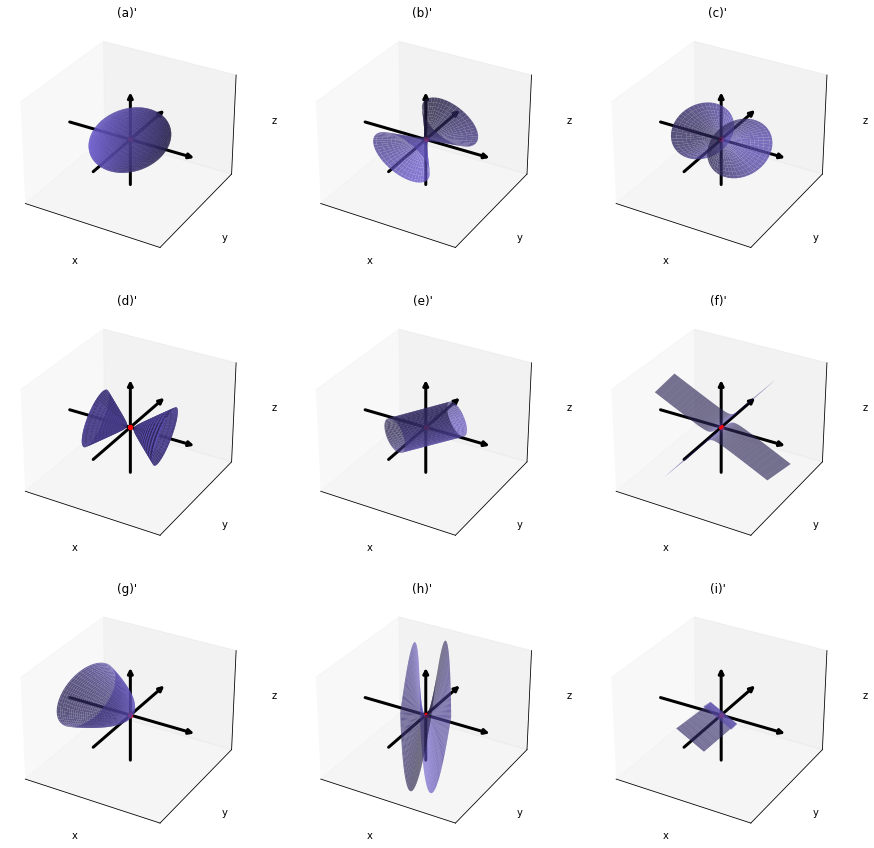

In [25]:
radius = 5

fig = plt.figure(figsize=(15,15))

for i in range(3*3):
    ax = fig.add_subplot(3, 3,  i + 1, projection='3d')
    resolution = 100
    u=np.linspace(quad_dict[i]['u_range'][0], quad_dict[i]['u_range'][1], resolution)
    v=np.linspace(quad_dict[i]['v_range'][0], quad_dict[i]['v_range'][1], resolution)
    u,v=np.meshgrid(u,v)
    
    shift_vector = np.zeros(3)
    quad_dict[i]['function'](ax, quad_dict[i]['abc_list'], u, v, 
                             rotation_matrix=quad_dict[i]['rotation_matrix'], shift_vector=shift_vector)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.scatter(shift_vector[0], shift_vector[1], shift_vector[2], c='red')
    
    axis_range = 20
    
    ax.set_xlim(-axis_range, axis_range)
    ax.set_ylim(-axis_range, axis_range)
    ax.set_zlim(-axis_range, axis_range)
    ax.set_title(quad_dict[i]['title'] + "'")

    ax.arrow3D(-axis_range, 0, 0, 2*axis_range, 0, 0, 
                       mutation_scale=10,  arrowstyle="-|>", fc='black', ec='black', lw = 3)
    ax.arrow3D(0, -axis_range, 0, 0, 2*axis_range, 0, 
                       mutation_scale=10, arrowstyle="-|>", fc='black', ec='black', lw = 3)
    ax.arrow3D(0, 0, -axis_range, 0, 0, 2*axis_range, 
                       mutation_scale=10, arrowstyle="-|>", fc='black', ec='black', lw = 3)
    
plt.savefig('quad_types_2.png')
plt.show()

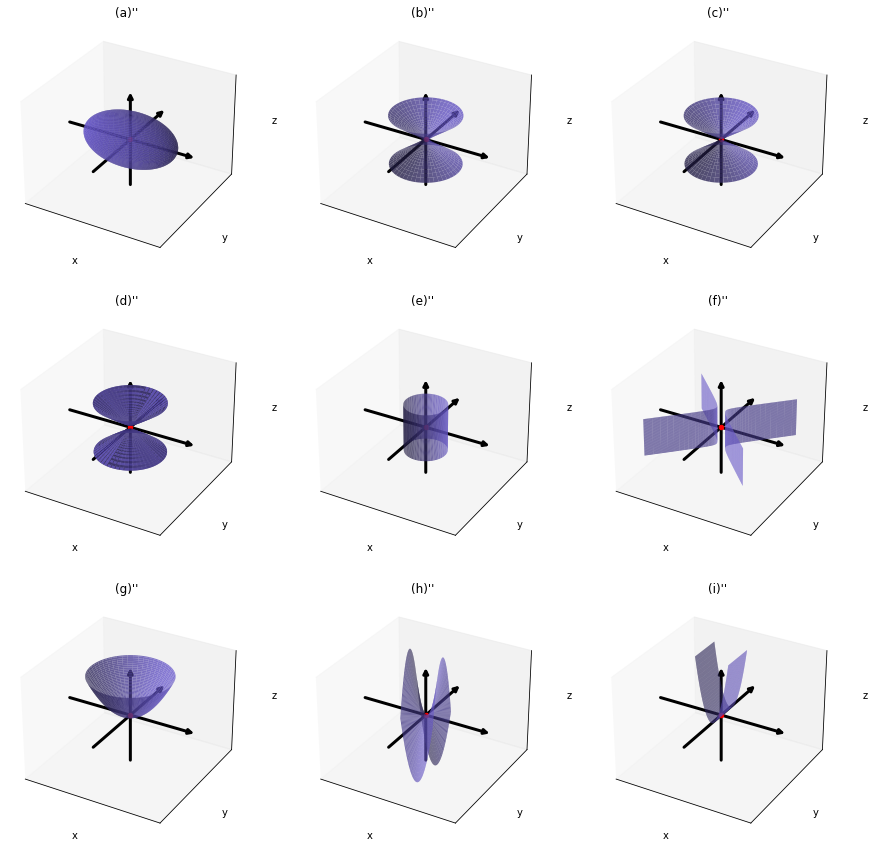

In [26]:
radius = 5

fig = plt.figure(figsize=(15,15))

for i in range(3*3):
    ax = fig.add_subplot(3, 3,  i + 1, projection='3d')
    resolution = 100
    u=np.linspace(quad_dict[i]['u_range'][0], quad_dict[i]['u_range'][1], resolution)
    v=np.linspace(quad_dict[i]['v_range'][0], quad_dict[i]['v_range'][1], resolution)
    u,v=np.meshgrid(u,v)
    quad_dict[i]['function'](ax, quad_dict[i]['abc_list'], u, v)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.scatter(shift_vector[0], shift_vector[1], shift_vector[2], c='red')
    
    axis_range = 20
    
    ax.set_xlim(-axis_range, axis_range)
    ax.set_ylim(-axis_range, axis_range)
    ax.set_zlim(-axis_range, axis_range)
    ax.set_title(quad_dict[i]['title']+"''")
    
    ax.arrow3D(-axis_range, 0, 0, 2*axis_range, 0, 0, 
                       mutation_scale=10,  arrowstyle="-|>", fc='black', ec='black', lw = 3)
    ax.arrow3D(0, -axis_range, 0, 0, 2*axis_range, 0, 
                       mutation_scale=10, arrowstyle="-|>", fc='black', ec='black', lw = 3)
    ax.arrow3D(0, 0, -axis_range, 0, 0, 2*axis_range, 
                       mutation_scale=10, arrowstyle="-|>", fc='black', ec='black', lw = 3)
    
plt.savefig('quad_types_3.png')
plt.show()